In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
# Define custom colormap
from matplotlib.colors import LogNorm, PowerNorm

class ComplexGrid(): 
    def __init__(self, N, real_range, imag_range):
        self.N = N
        self.real_range = real_range
        self.imag_range = imag_range
     
    def generate_grid(self, func):
        real = np.linspace(self.real_range[0], self.real_range[1], self.N)
        imag = np.linspace(self.imag_range[0], self.imag_range[1], self.N)
        XX, YY = np.meshgrid(real, imag)
        Z = XX + 1j * YY

        # Vectorizing the function to apply to each grid point
        vec_func = np.vectorize(func)
        return vec_func(Z)


class Mandlebrot(ComplexGrid):
    def __init__(self, n_max, real_range, imag_range, grid_points):
        super().__init__(grid_points, real_range, imag_range)
        self.n_max = n_max

    def __next_element(self, zn, c):
        """Computes the next element in the Mandelbrot sequence."""
        return zn**2 + c
    
    def __divergence_speed(self, c):
        """Returns a continuous escape time for smooth gradients."""
        zn = 0
        for n in range(1, self.n_max + 1):
            zn = self.__next_element(zn, c)
            if abs(zn) >= 2:
                # Apply logarithmic smoothing for a more gradual color transition
                return n + 1 - math.log(math.log(abs(zn))) / math.log(2)
        return self.n_max + 1  # Non-escaping points
        
    def plot(self, save = False):
        """Computes and visualizes the Mandelbrot set."""
        mandelbrot = self.generate_grid(func=self.__divergence_speed)

        # Mask the points that did not escape (mandelbrot set) to ensure they are black
        mandelbrot_masked = np.ma.masked_where(mandelbrot > self.n_max, mandelbrot)


        # Define custom normalization (choose one)
        cmap = plt.cm.Blues
        cmap.set_bad(color="black")  # Ensures non-escaping points are black
        norm = LogNorm(vmin = 1, vmax=self.n_max)

        # Plot the Mandelbrot set
        plt.figure(figsize=(6, 6))
        plt.style.use('seaborn-v0_8-dark')  # Clean dark background
        plt.imshow(mandelbrot_masked, extent=[self.real_range[0], self.real_range[1],
                                              self.imag_range[0], self.imag_range[1]],
                   cmap=cmap,
                   norm = norm)

        plt.xlabel(r"Re($\mathbb{C}$)")
        plt.ylabel(r"Im($\mathbb{C}$)")
        if save:
            plt.savefig('mandlebrot.png')
        else:
            plt.show()

class Julia(ComplexGrid):
    def __init__(self, c, n_max, real_range, imag_range, grid_points):
        super().__init__(grid_points, real_range, imag_range)
        self.n_max = n_max
        self.c = c

    def __next_element(self, zn, c):
        """Computes the next element in the Mandelbrot sequence."""
        return zn**2 + c
    

    def __divergence_speed(self, z0):
        """Returns a continuous escape time for smooth gradients."""
        # First element 
        zn = z0
        for n in range(1, self.n_max + 1):
            zn = self.__next_element(zn, self.c)
            if abs(zn) >= 2:
                # Apply logarithmic smoothing for a more gradual color transition
                return n + 1 - math.log(math.log(abs(zn))) / math.log(2)
        return self.n_max + 1  # Non-escaping points
    

    def plot(self, save = False):
        """Computes and visualizes the Mandelbrot set."""
        mandelbrot = self.generate_grid(func=self.__divergence_speed)

        # Mask the points that did not escape (mandelbrot set) to ensure they are black
        mandelbrot_masked = np.ma.masked_where(mandelbrot > self.n_max, mandelbrot)


        # Define custom normalization (choose one)
        cmap = plt.cm.Blues
        cmap.set_bad(color="black")  # Ensures non-escaping points are black
        norm = LogNorm(vmin = 1, vmax=self.n_max)
        # Plot the Mandelbrot set
        plt.figure(figsize=(6, 6))
        plt.style.use('seaborn-v0_8-dark')  # Clean dark background
        plt.imshow(mandelbrot_masked, extent=[self.real_range[0], self.real_range[1],
                                              self.imag_range[0], self.imag_range[1]],
                   cmap=cmap,
                   norm=norm)

        plt.xlabel(r"Re($\mathbb{C}$)")
        plt.ylabel(r"Im($\mathbb{C}$)")
        if save:
            plt.savefig('julia.png')
        else:
            plt.show()




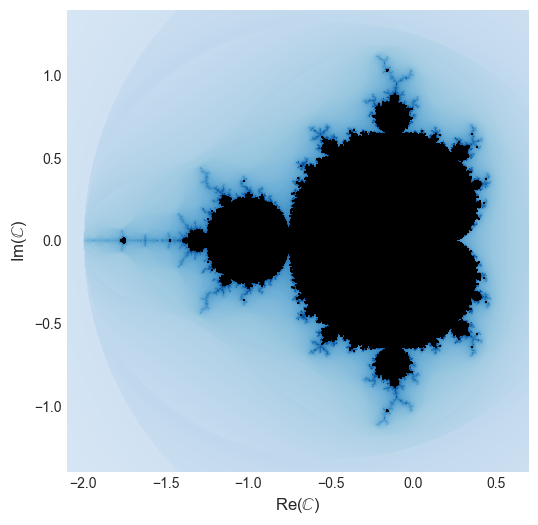

In [207]:
width_height = 2.8
start_real = -2.1
real_range = (start_real, start_real + width_height)
imag_range = (- width_height/2, width_height/2)

mandelbrot = Mandlebrot(n_max=100, real_range=real_range, imag_range=imag_range, grid_points=500)
mandelbrot.plot()

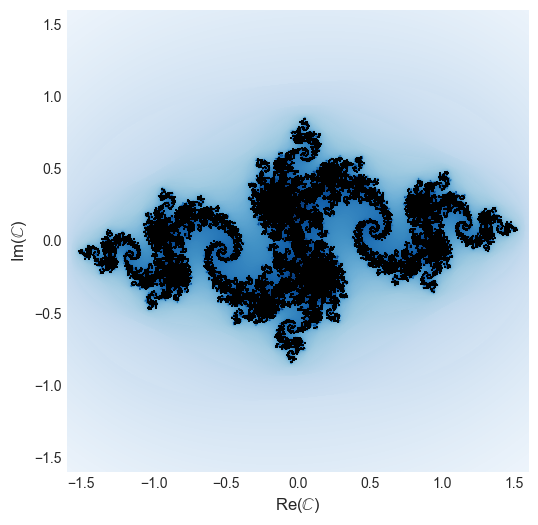

In [206]:
julia = Julia(c=-0.8 + 0.156j, n_max=100, real_range=(-1.6, 1.6), imag_range=(-1.6, 1.6), grid_points=500)
julia.plot()
